In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings
from pathlib import Path


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r"C:\Users\harip\Dairy data Analysis"

In [4]:
# Importing the dataset
df= pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'Dairy data cleaned.csv'), index_col = False)

In [5]:
# Renaming the columns
df.rename(columns = {'Date recording date':'Date of recording'}, inplace = True)

In [6]:
df.head()

,States,Total Land Area (acres),Number of Cows,Farm Size per sq.km,Date of recording,Product ID,Product Name,Brand,Quantity (liters/kg),Overall Prices,...,Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales categories,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg),Year of recording data,Sales,Price flag
0,Madhya Pradesh,387.21,92,Large,01/01/2019,3,Cheese,Passion Cheese,714.67,88.78,...,89.54,27220.16,West Bengal,Wholesale,410,74.72,99.37,2019,Moderate Sales,Moderately priced
1,Uttar Pradesh,58.59,82,Small,01/01/2019,7,Lassi,Amul,963.16,89.01,...,92.35,39618.15,Rajasthan,Online,534,73.75,150.18,2019,Moderate Sales,Moderately priced
2,Telangana,984.43,95,Medium,01/01/2019,10,Ghee,Mother Dairy,564.08,79.42,...,77.21,32968.67,Kerala,Retail,137,27.65,33.44,2019,Moderate Sales,Moderately priced
3,Delhi,16.51,58,Large,01/01/2019,9,Paneer,Mother Dairy,592.76,64.76,...,63.47,14598.10,Chandigarh,Wholesale,362,88.03,57.12,2019,Low Sales,Moderately priced
4,Madhya Pradesh,987.38,71,Medium,01/01/2019,5,Ice Cream,Mother Dairy,355.40,75.69,...,72.41,8399.56,Maharashtra,Retail,239,65.49,42.61,2019,Low Sales,Moderately priced


In [7]:
df.shape

(4325, 26)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   States                               4325 non-null   object 
 1   Total Land Area (acres)              4325 non-null   float64
 2   Number of Cows                       4325 non-null   int64  
 3   Farm Size per sq.km                  4325 non-null   object 
 4   Date of recording                    4325 non-null   object 
 5   Product ID                           4325 non-null   int64  
 6   Product Name                         4325 non-null   object 
 7   Brand                                4325 non-null   object 
 8   Quantity (liters/kg)                 4325 non-null   float64
 9   Overall Prices                       4325 non-null   float64
 10  Total Value of products available    4325 non-null   float64
 11  Shelf Life (days)             

In [9]:
df.head()

,States,Total Land Area (acres),Number of Cows,Farm Size per sq.km,Date of recording,Product ID,Product Name,Brand,Quantity (liters/kg),Overall Prices,...,Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales categories,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg),Year of recording data,Sales,Price flag
0,Madhya Pradesh,387.21,92,Large,01/01/2019,3,Cheese,Passion Cheese,714.67,88.78,...,89.54,27220.16,West Bengal,Wholesale,410,74.72,99.37,2019,Moderate Sales,Moderately priced
1,Uttar Pradesh,58.59,82,Small,01/01/2019,7,Lassi,Amul,963.16,89.01,...,92.35,39618.15,Rajasthan,Online,534,73.75,150.18,2019,Moderate Sales,Moderately priced
2,Telangana,984.43,95,Medium,01/01/2019,10,Ghee,Mother Dairy,564.08,79.42,...,77.21,32968.67,Kerala,Retail,137,27.65,33.44,2019,Moderate Sales,Moderately priced
3,Delhi,16.51,58,Large,01/01/2019,9,Paneer,Mother Dairy,592.76,64.76,...,63.47,14598.10,Chandigarh,Wholesale,362,88.03,57.12,2019,Low Sales,Moderately priced
4,Madhya Pradesh,987.38,71,Medium,01/01/2019,5,Ice Cream,Mother Dairy,355.40,75.69,...,72.41,8399.56,Maharashtra,Retail,239,65.49,42.61,2019,Low Sales,Moderately priced


In [10]:
df['Date of recording'] = pd.to_datetime(df['Date of recording'])

In [11]:
df_1 = df.groupby('Date of recording').median()

In [12]:
df_1

,Total Land Area (acres),Number of Cows,Product ID,Quantity (liters/kg),Overall Prices,Total Value of products available,Shelf Life (days),Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg),Year of recording data
Date of recording,,,,,,,,,,,,,,
2019-01-01,462.295,76.5,6.0,578.420,79.350,41593.18560,26.0,306.5,78.965,26081.320,300.5,69.620,62.415,2019.0
2019-01-02,222.280,90.0,9.0,499.950,85.100,37123.05060,9.0,248.0,81.320,17166.720,330.0,87.370,150.120,2019.0
2019-01-03,134.280,41.0,5.0,672.530,63.760,37271.61260,13.0,21.0,64.450,1383.270,232.0,65.500,112.860,2019.0
2019-01-04,832.140,68.0,6.5,359.685,82.135,29243.40355,11.0,179.0,79.640,14398.710,180.5,68.210,102.105,2019.0
2019-01-05,510.350,32.5,7.5,467.635,31.410,11126.36300,50.5,161.5,30.780,5902.685,154.5,52.915,120.920,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-24,165.140,37.0,2.0,412.570,40.990,10359.63270,29.0,304.0,39.410,8094.160,87.0,64.550,143.800,2022.0
2022-12-25,471.020,52.5,7.5,245.285,71.585,14717.10510,33.0,177.0,69.945,7336.070,119.5,56.075,118.355,2022.0
2022-12-26,379.100,73.0,6.0,649.840,89.390,58089.19760,5.0,314.0,85.380,26809.320,335.0,94.990,174.000,2022.0


In [13]:
df_1 = df_1.groupby(by=['Date of recording','Approx. Total Revenue(INR)']).sum().reset_index()

In [14]:
# Creating a subset
df_new = df_1[['Date of recording','Approx. Total Revenue(INR)']]

In [15]:
df_new.shape

(1278, 2)

In [16]:
df_new

,Date of recording,Approx. Total Revenue(INR)
0,2019-01-01,26081.320
1,2019-01-02,17166.720
2,2019-01-03,1383.270
3,2019-01-04,14398.710
4,2019-01-05,5902.685
...,...,...
1273,2022-12-24,8094.160
1274,2022-12-25,7336.070
1275,2022-12-26,26809.320
1276,2022-12-27,13585.590


In [17]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18,7

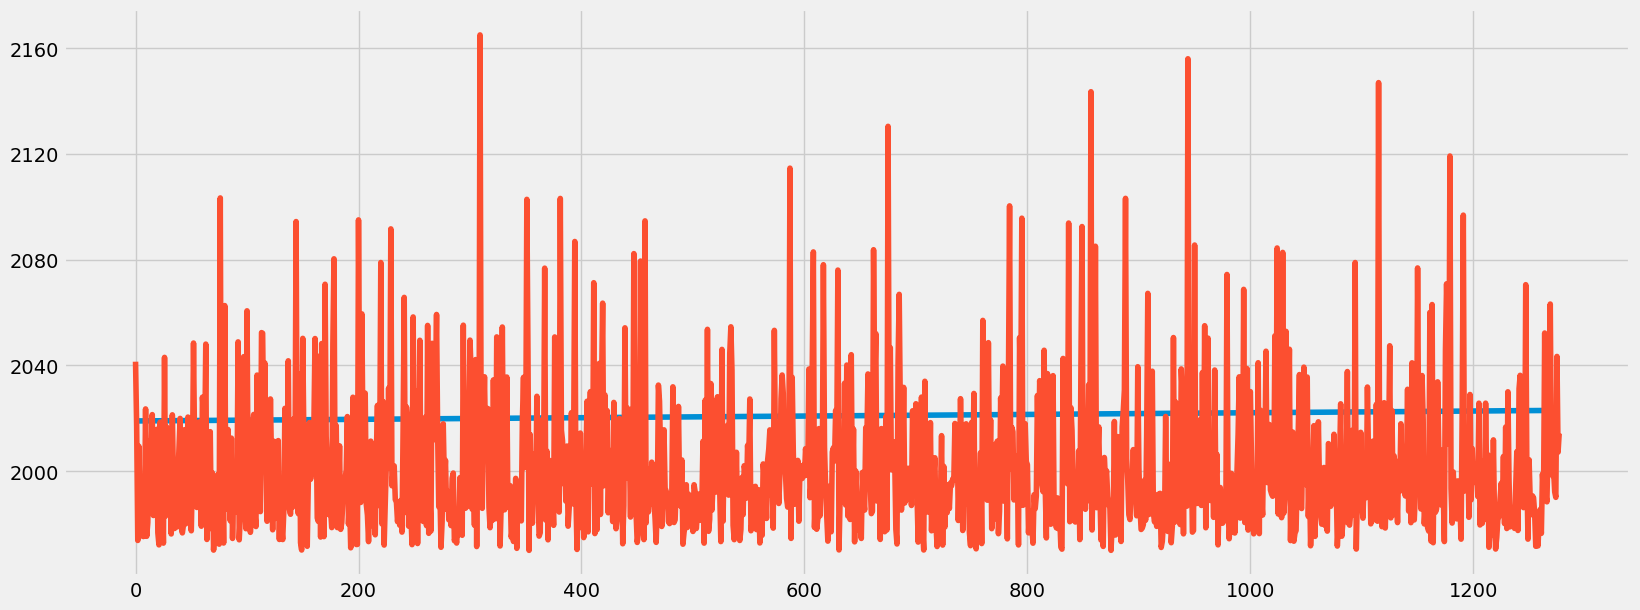

In [18]:
# Plot the data using matplotlib.

plt.figure(figsize=(18,7), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(df_new)

In [19]:
# Check for missing values (you shouldn't have any)

df_new.isnull().sum() 

Date of recording             0
Approx. Total Revenue(INR)    0
dtype: int64

In [20]:
# Check for duplicates

dups = df_new.duplicated()
dups.sum()

0

# Time-series analysis: decomposition

In [21]:
df_new['Date of recording'] = pd.to_numeric(pd.to_datetime(df_new['Date of recording']))

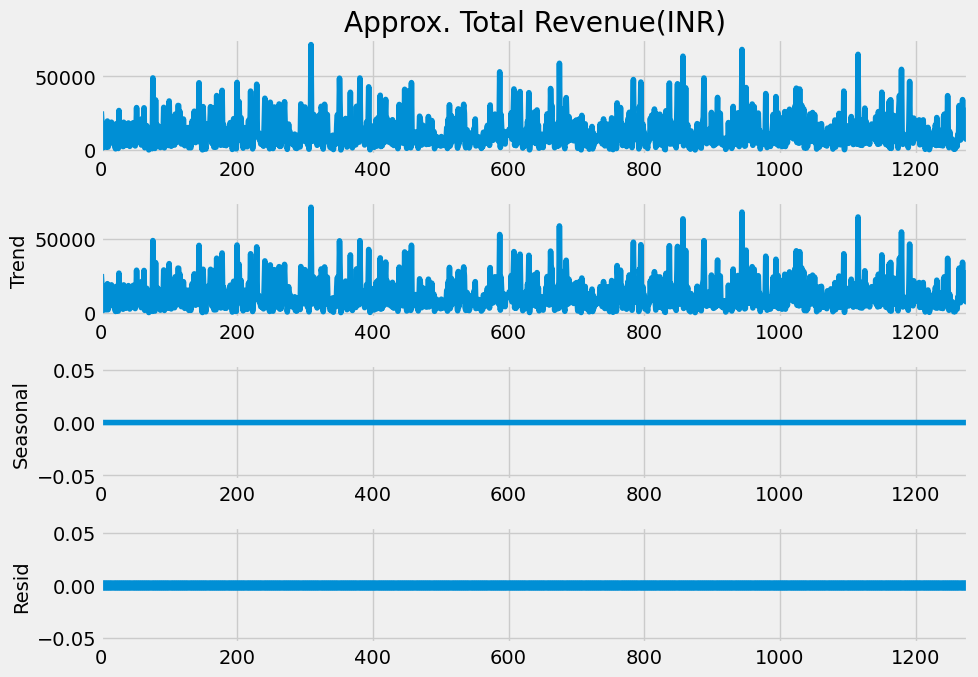

In [22]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_new['Approx. Total Revenue(INR)'], model='additive', extrapolate_trend='freq', period = 1)
plt.rcParams.update({'figure.figsize': (10,7)})
decomposition.plot()
plt.show()

From the  above chart, trend line appears to be stationary and there is no seasonality in this time series. Apparently there is no noise in this data. From the graph we could say that the data is linear.

# Checking for stationarity

In [23]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_new['Approx. Total Revenue(INR)'])

Dickey-Fuller Stationarity test:
Test Statistic                  -24.119815
p-value                           0.000000
Number of Lags Used               1.000000
Number of Observations Used    1276.000000
Critical Value (1%)              -3.435485
Critical Value (5%)              -2.863808
Critical Value (10%)             -2.567977
dtype: float64


### Obervations,

Test statistics = -24.11 < Critical Value = -2.86

P value is <0.05

Thus proves, that the null hypothesis can be rejected and the series is stationary.

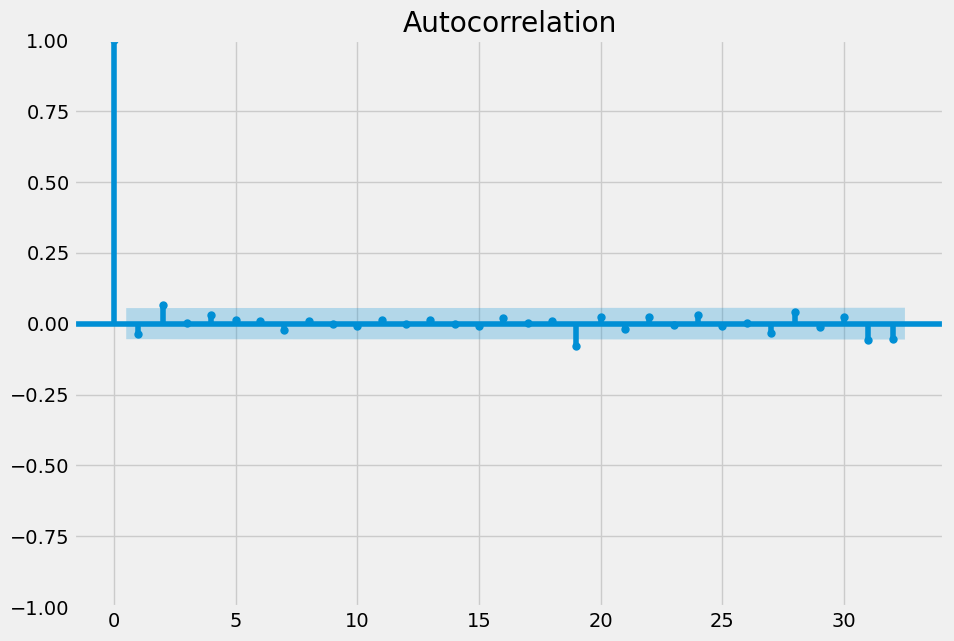

In [24]:
# Checking for Auto correlation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_new['Approx. Total Revenue(INR)'])
plt.show()

The auto correlation shows a stationary relationship most of the lines comes into to the confidence interval but still I could see only three intervals peaking up. This indicates that though the Dickey fuller test says that the data is stationary it still has some irregularities. I could have further performed it to bring it to the auto correlated terms but as per the rule of thumb atlest we need 10 vertical lines above the confidence interval.